In [0]:
import pandas as pd
import pickle

In [0]:
#loading saved dataframe with pickle
df = pickle.load(open('/content/df_file.sav','rb'))
df.head()

sku  national_inv  lead_time  ...  stop_auto_buy  rev_stop  went_on_backorder
1   1043384           2.0        9.0  ...              1         0                 No
3   1043852           7.0        8.0  ...              1         0                 No
5   1044198          13.0        8.0  ...              1         0                 No
9   1045867           4.0        8.0  ...              1         0                 No
15  1049468          11.0        8.0  ...              1         0                 No

[5 rows x 23 columns]

- Random Forest Classifier

In [0]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [0]:
df.drop(columns=['sku'],inplace=True)

In [0]:
df.shape

(1203590, 22)

In [0]:
X = df.iloc[:,0:21]
y = df['went_on_backorder']

1           No
3           No
5           No
9           No
15          No
          ... 
1687852     No
1687854     No
1687857    Yes
1687858     No
1687859     No
Name: went_on_backorder, Length: 1203590, dtype: object

- Model Parameter

In [0]:
print(X.columns)

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')
1           No
3           No
5           No
9           No
15          No
          ... 
1687852     No
1687854     No
1687857    Yes
1687858     No
1687859     No
Name: went_on_backorder, Length: 1203590, dtype: object


In [0]:
df['went_on_backorder'].value_counts()

No     1196273
Yes       7317
Name: went_on_backorder, dtype: int64

- Fitting model on highly imbalanced dataset.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = rf_clf.predict(X_test)

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Model Accuracy ->>',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

MOdel Accuracy ->> 0.9951345638721427
              precision    recall  f1-score   support

          No       1.00      1.00      1.00    299000
         Yes       0.92      0.25      0.40      1898

    accuracy                           1.00    300898
   macro avg       0.96      0.63      0.70    300898
weighted avg       0.99      1.00      0.99    300898



- Model accuracy is very high but it is failing to efficiently determine class Yes. There are lots of false negative for class Yes.

**- We'll use SMOTE to gain balance in dataset.**

In [0]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({'No': 1196273, 'Yes': 1196273})


In [0]:
X_res.shape

(2392546, 21)

In [0]:
#checking balance in class
y_res_df = pd.Series(y_res)
y_res_df.value_counts()

Yes    1196273
No     1196273
dtype: int64

-we've achieved perfectly balanced dataset.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)
rf_clf_res = RandomForestClassifier(class_weight="balanced")
rf_clf_res.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [0]:
y_pred = rf_clf_res.predict(X_test)

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Model Accuracy after using SMOTE to upsample dataset ->>',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Model Accuracy after using SMOTE to upsample dataset ->> 0.9972280597923219
              precision    recall  f1-score   support

          No       1.00      1.00      1.00    298984
         Yes       1.00      1.00      1.00    299153

    accuracy                           1.00    598137
   macro avg       1.00      1.00      1.00    598137
weighted avg       1.00      1.00      1.00    598137



- Accuracy is decent with default settings, no need to fine tune model.

In [0]:
#saving model
model = 'rf_clf_res'
pickle.dump(rf_clf_res,open(model,'wb'))

In [0]:
from sklearn.tree import export_graphviz
estimator = rf_clf_res.estimators_[5]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = ['Yes','No'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

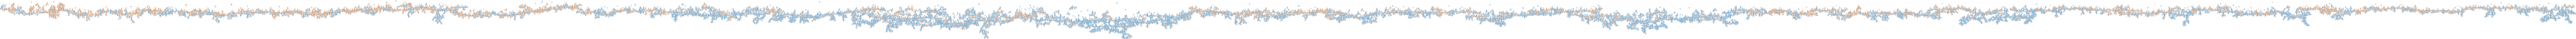

In [0]:
from IPython.display import Image
Image(filename = 'tree.png')